<h1>Machine Learning</h1>

In [39]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 1-8.PNG to 1-8.PNG
Saving 1-9.PNG to 1-9.PNG
User uploaded file "1-8.PNG" with length 24827 bytes
User uploaded file "1-9.PNG" with length 32027 bytes


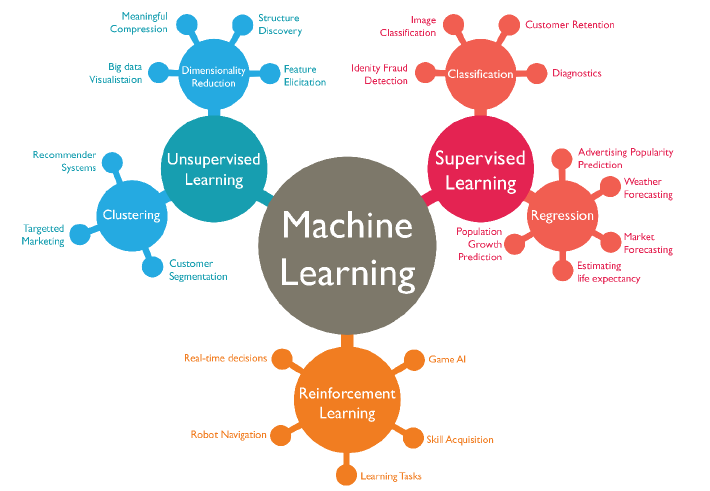

In [24]:
from IPython.display import Image
Image('1-1.PNG')

<h1>Supervised Learning</h1>


---

지도학습에는 회귀(Regression)와 분류(Classification)가 있다.
회귀의 예로는 시험 성적을 예측하는 (Linear Regression)이 있다.
분류에는 Pass/Fail과 같이 두 가지를 분류하는 Binary Classification과 알파벳 모양을 분류하는 Multi-Level Classification이 있다.

<h2>Linear Regression</h2>

Linear model : H(x) = Wx + b

Cost Function(Loss Function) : (H(x) -  y)<sup>2</sup>

\begin{align*}
  Cost(W,b) = \frac1m \sum_{i=1}^m (H(x^i) - y^i)^2   = \frac1m \sum_{i=1}^m(Wx^i + b - y^i)^2
\end{align*}


How to Minimize this Function? **Gradient Descent Method**



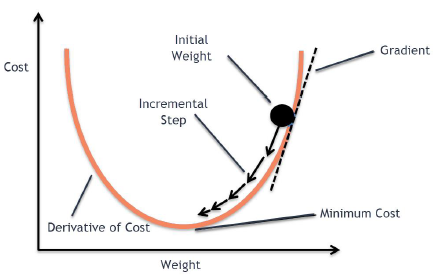

In [8]:
Image('/1-2.PNG')

<h2>Multi-Variable Linear Regression</h2>

---



*   **Model** : \begin{align*}
 H(x_1, x_2, ... , x_n) = w_1x_1 + w_2x_2 + ... + w_nx_n + b 
 \\ \left(
\begin{array}
{ccc} x_1 \quad  x_2 \quad ... \quad x_n 
\end{array}
\right) 
\cdot 
\left(\begin{array}{ccc} w_1 \\w_2 \\ \cdots \\ w_n \end{array}\right)
= w_1x_1 + w_2x_2 + \cdots + w_nx_n \\
\end{align*}

*   **Cost(W , b)** : \begin{align*}\frac1m \sum_{i=1}^m (H(x_1^i, x_2^i,...,x_n^i) - y^i)^2
\end{align*}





<h2>Linear Regression Implementation</h2>

---
<h3>Linear Regression with One-Dimensional Data</h3>

In [0]:
import tensorflow as tf

x_data = [[1], [2], [3]]
y_data = [[1], [2], [3]]
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

model = X * W + b #모델
cost = tf.reduce_mean(tf.square(model - Y)) #제곱의 합의 평균
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(500) :
    c, W_, b_, _ = sess.run([cost, W, b, train], feed_dict={X:  x_data, Y: y_data})
    print(step, c, W_, b_)
  print(sess.run(model, feed_dict={X: [[4]]}))

<h3>Linear Regression with High-Dimensional Data</h3>

In [0]:
import tensorflow as tf

x_data = [ [1,1], [2,2], [3,3] ]
y_data = [ [10], [20], [30] ]
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

model = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(model - Y))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

with tf.Session() as sess :
  sess.run(tf.global_variables_initializer())
  
  for step in range(2001) :
    c, W_, b_, _ = sess.run([cost, W,b,train], feed_dict = {X: x_data, Y: y_data})
    print(step, c, W_, b_)
  
  print(sess.run(model, feed_dict={X:[[4,4]]}))

<h2>Binary Classification</h2>

---

<h3>Binary Classification Examples</h3>

*   Spam Detection: Spam [1] or Ham [0]
*   Facebook Feed: Show [1] or Hide [0]
* Credit Card Fraudulent Transaction Detection: Fraud [1] or Legitimate [0]
* Tumor Image Detection in Radiology: Malignant [1] or Benign [0]

<h3>Binary Classification Basic Idea</h3>

* Step 1) Linear regression with H(x) = Wx + b
* Step 2) Logistic/sigmoid function (sig(t)) based on the result of Step 1.

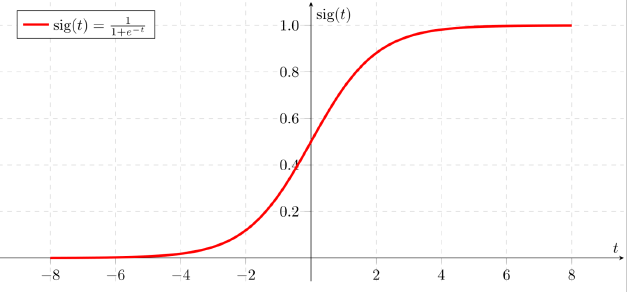

In [31]:
Image('1-4.PNG')

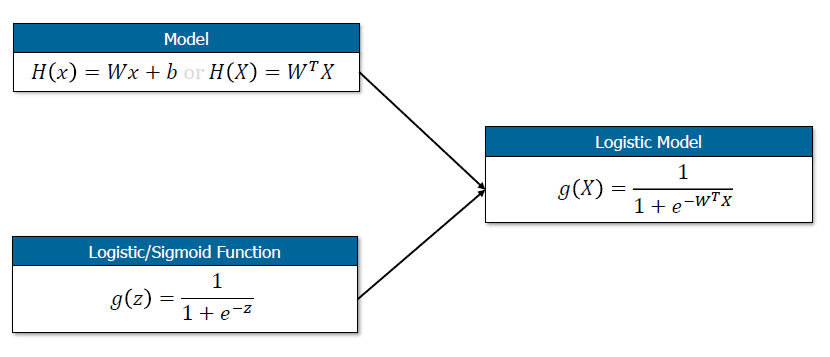

In [32]:
Image('1-5.PNG')

##Logistic Hypothesis

\begin{align*}
  g(z) = \frac1{1+e^{-W^TX}}
\end{align*}

##Cost Function##

Gradient Descent Method can not be used because Cost(W,b) is non-convex. **New Cost Function is required.**

\begin{align*}
  Cost(W) = \frac1m\sum c(H(x),y) \\
  c(H(x), y) = \begin{cases}-log(H(x)) & y=1 \\ -log(1-H(x))&y=0\end{cases} \\
  c(H(x),y) = -ylog(H(x)) - (1-y)log(1-H(x))\\
  Cost(W) = -\frac1m\sum ylog(H(x)) + (1-y)log(1-H(x))
\end{align*}

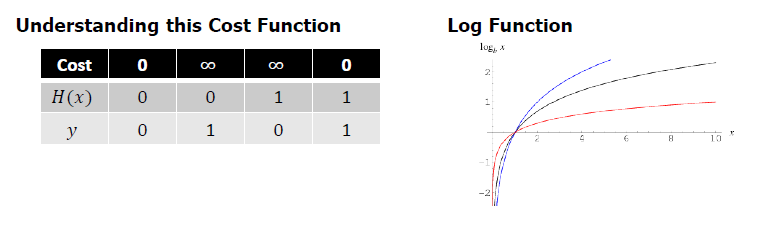

In [37]:
Image('1-6.PNG')

<h2>Binary Classification Implementation</h2>

In [0]:
import tensorflow as tf

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]
X = tf.placeholder(tf.float32, shape = [None, 2])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

model = tf.sigmoid(tf.add(tf.matmul(X,W) , b))
cost = tf.reduce_mean((-1)*Y*tf.log(model) + (-1)*(1-Y)*tf.log(1-model))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

prediction = tf.cast(model > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), dtype=tf.float32))

with tf.Session() as sess :
  sess.run(tf.global_variables_initializer())
  
  for step in range(1000) :
    cost_val, train_val = sess.run([cost, train], feed_dict = {X: x_data, Y: y_data})
    print(step, cost_val)
    
  h, c, a = sess.run([model, prediction, accuracy], feed_dict = {X: x_data, Y: y_data})
  print("\nModel: ", h, "\nCorrect: ", c, "\nAccuracy: ",a)

<h2>Binary Classification Implementation(using CSV File)</h2>

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

import tensorflow as tf
import numpy as np

xy = np.loadtxt('gdrive/My Drive/data-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1] # 0~마지막이전 데이타
y_data = xy[:, [-1]] # 마지막 데이타

X = tf.placeholder(tf.float32, shape=[None,x_data.shape[1]])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([x_data.shape[1],1]))
b = tf.Variable(tf.random_normal([1]))

model = tf.sigmoid(tf.add(tf.matmul(X,W), b))
cost = tf.reduce_mean((-1)*Y*tf.log(model) + (-1) * (1-Y)*tf.log(1-model))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

prediction = tf.cast(model > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, Y), dtype=tf.float32))

with tf.Session() as sess:
	sess.run(tf.global_variables_initializer())
	
	for step in range(10001) : 
		cost_val, train_val = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
		print(step, cost_val)
	h, c, a = sess.run([model, prediction, accuracy], feed_dict={X:x_data, Y: y_data})
	print("\nModel: ", h, "\nCorrect: ", c, "\nAccuracy: ",a)

<h2> SoftMax </h2>

---

SoftMax는 다중분류 기법의 하나로, 데이터가 하나의 라벨값일 확률을 각각 구해서 그 중 가장 높은 확률을 보이는 것을 One-Hot Encoding(argmax)를 통해서 분류한다.


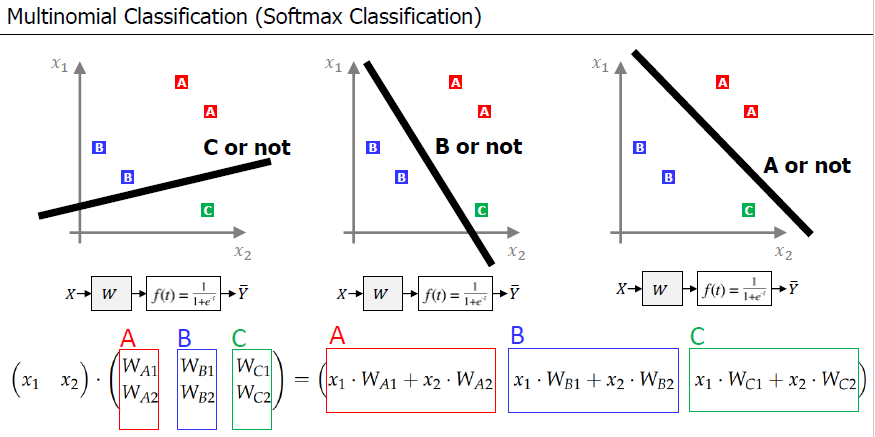

In [38]:
Image('1-7.PNG')

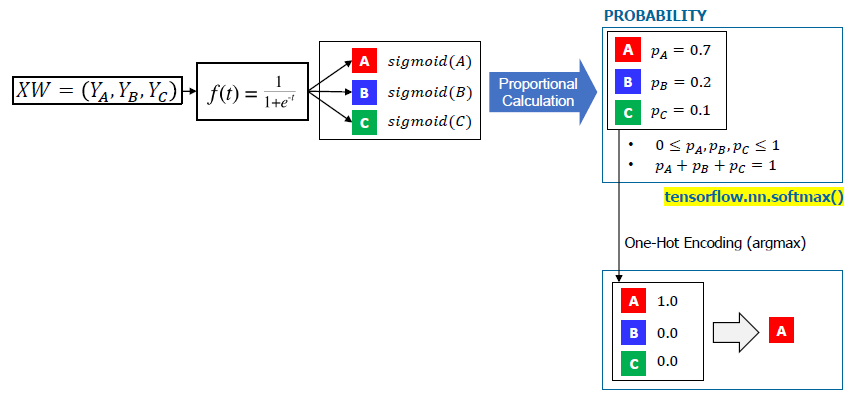

In [40]:
Image('1-8.PNG')

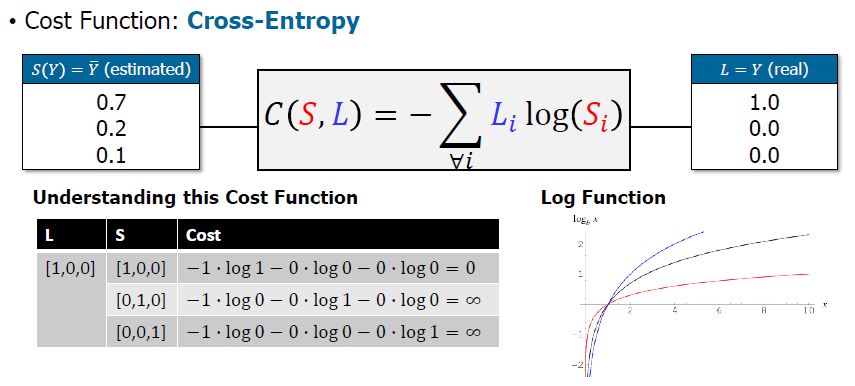

In [41]:
Image('1-9.PNG')

Cost Function이 Cross-Entropy라고 불리는 이유는 원래의 결과값과 추정값이 Cross되면 그 수가 무한대로 발산하기 때문이다.

<h3>Vector Representation</h3>
\begin{align*}
  \left(x_1 \quad x_2\quad x_3\quad x_4
  \right)\cdot \left(\begin{array} \\W_{A1}\quad W_{B1}\quad W_{C1} \\ W_{A2}\quad W_{B2}\quad W_{C2} \\ W_{A3}\quad W_{B3}\quad W_{C3} \\ W_{A4}\quad W_{B4}\quad W_{C4}
  \end{array}\right) = \left(S_A\quad S_B\quad S_C\right) \\ S_A = x_1\cdot W_{A1} + x_2\cdot W_{A2} + x_3\cdot W_{A3} + x_4\cdot W_{A4} + b_A\\S_B = x_1\cdot W_{B1} + x_2\cdot W_{B2} + x_3\cdot W_{B3} + x_4\cdot W_{B4} + b_B\\S_C = x_1\cdot W_{C1} + x_2\cdot W_{C2} + x_3\cdot W_{C3} + x_4\cdot W_{C4} + b_C
\end{align*}

<h2>Softmax Classfication Implementation</h2>

In [0]:
import tensorflow as tf

x_data = [[1,2,1,1], [2,1,3,2], [3,1,3,4],[4,1,5,5], [1,7,5,5], [1,2,4,5], [1,6,6,6], [1,7,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0,], [0,1,0],[0,1,0], [1,0,0], [1,0,0]]
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 3])
W = tf.Variable(tf.random_normal([4,3]))
b = tf.Variable(tf.random_normal([3]))

model_LC = tf.add(tf.matmul(X,W), b) #nn.softmax_cross_entropy 함수를 얻기위해서
model = tf.nn.softmax(model_LC)      #클래스를 추정하는 확률이 나온다. 합이 1이다
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model_LC, labels=Y))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(3000) :
    c , _ = sess.run([cost, train], feed_dict={X:x_data, Y: y_data})
    print(step,c)
    
  test1 = sess.run(model, feed_dict={X: [[1,11,7,9]]})
  print(test1, sess.run(tf.argmax(test1, 1))) 

<h2>Softmax Classfication Implementation2</h2>

In [73]:
import tensorflow as tf

x_data = [[1,2,1,1], [2,1,3,2], [3,1,3,4],[4,1,5,5], [1,7,5,5], [1,2,4,5], [1,6,6,6], [1,7,7,7]]
y_data =  [[0],[0], [0],[0],[0],[0],[1],[1]]
y_data1 = [[0],[0],[0],[1],[1],[1],[0],[0]]
y_data2 = [[1],[1],[1],[0],[0],[0],[0],[0]]
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

WA = tf.Variable(tf.random_normal([4,1]))
WB = tf.Variable(tf.random_normal([4,1]))
WC = tf.Variable(tf.random_normal([4,1]))

b1 = tf.Variable(tf.random_normal([1]))
b2 = tf.Variable(tf.random_normal([1]))
b3 = tf.Variable(tf.random_normal([1]))

model1 = tf.sigmoid(tf.add(tf.matmul(X,WA), b1))
model2 = tf.sigmoid(tf.add(tf.matmul(X,WB), b2))
model3 = tf.sigmoid(tf.add(tf.matmul(X,WC), b3))

cost1 = tf.reduce_mean((-1)*Y*tf.log(model1) + (-1) * (1-Y)*tf.log(1-model1))
cost2 = tf.reduce_mean((-1)*Y*tf.log(model2) + (-1) * (1-Y)*tf.log(1-model2))
cost3 = tf.reduce_mean((-1)*Y*tf.log(model3) + (-1) * (1-Y)*tf.log(1-model3))

train1 = tf.train.GradientDescentOptimizer(0.01).minimize(cost1)
train2 = tf.train.GradientDescentOptimizer(0.1).minimize(cost2)
train3 = tf.train.GradientDescentOptimizer(0.01).minimize(cost3)


with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for step in range(10000) :
    c , _ = sess.run([cost1, train1], feed_dict={X:x_data, Y: y_data})
    print(step,c)
    c , _ = sess.run([cost2, train2], feed_dict={X:x_data, Y: y_data1})
    print(step,c)
    c , _ = sess.run([cost3, train3], feed_dict={X:x_data, Y: y_data2})
    print(step,c)
    
  test1 = sess.run(model1, feed_dict={X: [[1,11,7,9]]})
  test2 = sess.run(model2, feed_dict={X: [[1,11,7,9]]})
  test3 = sess.run(model3, feed_dict={X: [[1,11,7,9]]})
  
  sum = test1 + test2 + test3
  
  vec = [test1/sum, test2/sum, test3/sum]
  max = -1
  for i in vec :
    if i > max :
      max = i
      
  print(vec.index(i))

0 3.4630508
0 1.9194131
0 0.31230876
1 3.3731542
1 1.1859891
1 0.30944467
2 3.2950943
2 0.9279487
2 0.30678722
3 3.211576
3 0.90077287
3 0.3043239
4 3.1317706
4 0.87610215
4 0.30204248
5 3.0498977
5 0.85341877
5 0.29993123
6 2.9730968
6 0.8326522
6 0.2979786
7 2.8956475
7 0.81375813
7 0.29617363
8 2.814434
8 0.7966796
8 0.29450566
9 2.7340102
9 0.781343
9 0.29296464
10 2.6554313
10 0.7676597
10 0.29154092
11 2.575408
11 0.75552833
11 0.29022557
12 2.4961882
12 0.7448368
12 0.28901
13 2.4171786
13 0.7354672
13 0.28788608
14 2.3379376
14 0.7272984
14 0.28684658
15 2.2589855
15 0.7202091
15 0.28588426
16 2.1800604
16 0.71408135
16 0.28499264
17 2.1014683
17 0.7088024
17 0.28416568
18 2.0229712
18 0.704267
18 0.2833978
19 1.9447653
19 0.7003778
19 0.2826838
20 1.8668121
20 0.697047
20 0.28201893
21 1.7891729
21 0.6941952
21 0.2813989
22 1.7118833
22 0.6917529
22 0.2808196
23 1.635026
23 0.6896585
23 0.28027737
24 1.5586643
24 0.6878587
24 0.27976885
25 1.4828743
25 0.6863076
25 0.27929097
